In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)

In [2]:
df_pol = pd.read_csv('../../Data/Polution/pollution_2000_2021.csv')
df_fish = pd.read_csv('../../Data/Fish/Updated-Total-Landings.csv')

In [3]:
df_pol.head(1)


,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.04,10,37,0.878947,2.2,23,25.0,3.0,9.0,21,13.0,19.041667,49.0,19,46


In [4]:
df_fish = df_fish[df_fish['Year'] >= 2000]

In [5]:
df_fish

,Unnamed: 0,Year,Pounds,Metric Tons,Dollars,Collection
50,50,2000,8.852853e+09,4015628.0,3.655778e+09,Commercial
51,51,2001,9.268187e+09,4204022.0,3.220695e+09,Commercial
52,52,2002,9.225972e+09,4184873.0,3.091218e+09,Commercial
53,53,2003,9.308852e+09,4222468.0,3.318155e+09,Commercial
54,54,2004,9.618099e+09,4362741.0,3.754068e+09,Commercial
55,55,2005,9.596427e+09,4352911.0,3.988804e+09,Commercial
56,56,2006,9.629680e+09,4367994.0,4.223172e+09,Commercial
57,57,2007,9.367795e+09,4249204.0,4.306727e+09,Commercial
58,58,2008,8.419002e+09,3818834.0,4.543059e+09,Commercial
59,59,2009,8.115199e+09,3681030.0,3.958648e+09,Commercial


C:\Users\valor\AppData\Local\Temp/ipykernel_24920/2690481544.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


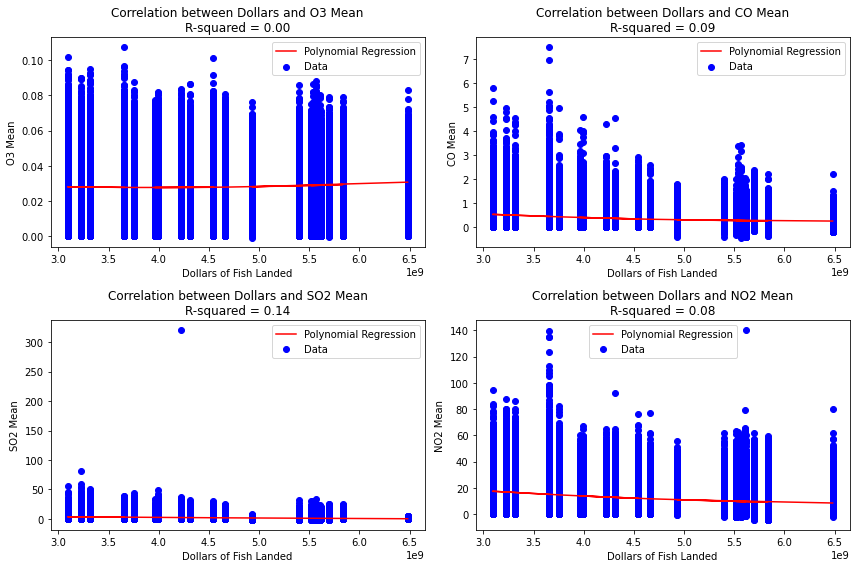

In [7]:
# Merge the two DataFrames on the 'Year' column
merged_df = pd.merge(df_fish, df_pol[['Year', 'O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']], on='Year')

# Select relevant columns
selected_df = merged_df[['Year', 'Dollars', 'O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']]

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X = selected_df['Dollars'].values.reshape(-1, 1)
X_poly = poly.fit_transform(X)

# Fit polynomial regression models
pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(pollutants):
    y = selected_df[pollutant].values

    # Fit polynomial regression
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Calculate R-squared score
    r2 = r2_score(y, y_pred)

    # Plot the data points and polynomial regression line
    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Polynomial Regression')
    plt.xlabel('Dollars of Fish Landed')
    plt.ylabel(pollutant)
    plt.title(f'Correlation between Dollars and {pollutant}\nR-squared = {r2:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()